In [1]:
import alpdesign as alp
from alpdesign.seq import *
from alpdesign.mlp import *
from alpdesign.utils import *
import jax
from jax_unirep import get_reps
import haiku as hk

In [2]:
target_seq = 'GIGAVLKVLTTGLPALISWIKRKRQQ'
oh_vec = encode_seq(list(target_seq))
target_rep = get_reps(target_seq)[0]
key = jax.random.PRNGKey(37)
logits = jax.random.normal(key, shape=(jnp.shape(oh_vec)))
b_logits = jax.random.normal(key, shape=(16, *jnp.shape(oh_vec)))
params = forward_seqprop.init(key, logits)

In [3]:
loss_traces, loss, _seqs = pso_train(key, target_rep, b_logits, params, batch_size=16, bag_num=6)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

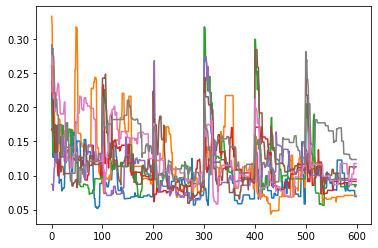

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = jnp.array(loss_traces)
for i in range(8):
    plt.plot(loss[i,:])
